
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---
  
# Análisis Estadístico de Datos - 2023

* **Profesor**: Diego Ravignani Guerrero
* **Prácticas**: Carmina Pérez Bertolli



---
---
## Trabajo Práctico 3 - Probabilidad Continua
---
---

Simular una variable aleatoria $X = (X_1, X_2)$ que sigue una distribución binormal con parámetros $\mu_1 = 2.3$,  $\mu_2 = 1.5$, $\sigma_1 = 1.2$, $\sigma_2 = 0.5$ y correlación $\rho = 0.7$. \\
Usar que la distribución conjunta
$$f(x_1, x_2) = h_2(x_2| x_1) g_1(x_1),$$
con $g_1(x_1)$ la distribución marginal de $X_1$ y $h_2(x_2| x_1)$ la distribución condicional de $X_2$ dado $X_1$. Esta distribución condicional se puede expresar como
$$h_2(x_2|x_1) = N(\mu_2',\sigma_2'^2)$$
con $\mu_2'=\mu_2+\rho \frac{\sigma_2}{\sigma_1}(x_1-\mu_1)$ y $\sigma_2'^2 = \sigma_2^2 (1 − \rho^2)$. \\
Repetir la simulación 1000 veces. Calcular la fracción de eventos caen en la elipse $1\sigma$ y comparar con la probabilidad contenida dentro de dicha región. Graficar 10 de los datos simulados junto a la elipse 1σ.

Nota: un punto $(x_1, x_2)$ pertenece a la elipse $r\sigma$ si la forma cuadrática asociada $q(x_1, x_2) ≤ r$.


---
### **Resolución**





 simulo la distribución usando las dos distribuciones:

$$f(x_1, x_2) = h_2(x_2| x_1) g_1(x_1),$$

donde

$$h_2(x_2|x_1) = N(\mu_2',\sigma_2'^2)$$
con $\mu_2'=\mu_2+\rho \frac{\sigma_2}{\sigma_1}(x_1-\mu_1)$ y $\sigma_2'^2 = \sigma_2^2 (1 − \rho^2)$. \\

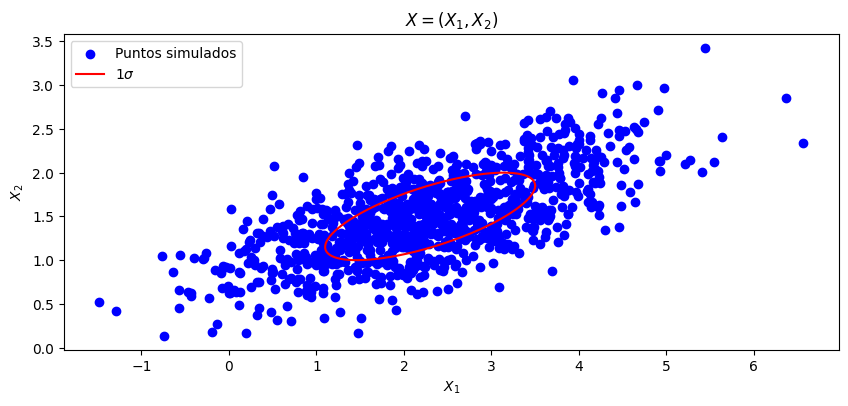

In [ ]:
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
N_simulaciones = 1000
mu1, mu2 = 2.3, 1.5
sigma1, sigma2 = 1.2, 0.5
rho = 0.7

# Vector mu y matriz de covarianza
mu = np.array([mu1, mu2])
cov = np.array([[sigma1**2, rho*sigma1*sigma2],
                [rho*sigma1*sigma2, sigma2**2]])

# Función para generar elipse
def get_ellipse(center, cova, nsigma=1, npoints=1000):
    cholesky_l = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, npoints)
    circle = np.column_stack([np.cos(t), np.sin(t)])
    ellipse = nsigma * circle @ cholesky_l.T + center
    return ellipse.T
    import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N_simulaciones = 1000
mu1, mu2 = 2.3, 1.5
sigma1, sigma2 = 1.2, 0.5
rho = 0.7

# Vector mu y matriz de covarianza
mu = np.array([mu1, mu2])
cov = np.array([[sigma1**2, rho*sigma1*sigma2],
                [rho*sigma1*sigma2, sigma2**2]])

# Función para generar elipse  (esto es de la practica)
def get_ellipse(center, cova, nsigma=1, npoints=1000):
    cholesky_l = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, npoints)
    circle = np.column_stack([np.cos(t), np.sin(t)])
    ellipse = nsigma * circle @ cholesky_l.T + center
    return ellipse.T

# Simulo X1 siguiendo la distribución marginal g1(x1)
X1 = np.random.normal(mu1, sigma1, size=N_simulaciones)

# Cálculo de parámetros para  X2
mu2_prima = mu2 + rho*(sigma2/sigma1)*(X1 - mu1)
sigma2_prima = np.sqrt(sigma2**2 * (1 - rho**2))

# Simulación de X2 ~ h2(x2|x1)
X2 = np.random.normal(mu2_prima, sigma2_prima, size=N_simulaciones)

#  fila de X
X = np.array([X1, X2]).T

# Gráfico  los puntos
plt.figure(figsize=(10, 8))
plt.scatter(X1, X2, c="blue", label="Puntos simulados")
elipse_1sigma = get_ellipse(mu, cov, nsigma=1)
plt.plot(elipse_1sigma[0,:], elipse_1sigma[1,:], c="red", label=r"$1\sigma$")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title(r"$X = (X_1, X_2)$")
plt.axis("scaled")
plt.legend(title="")
plt.show()


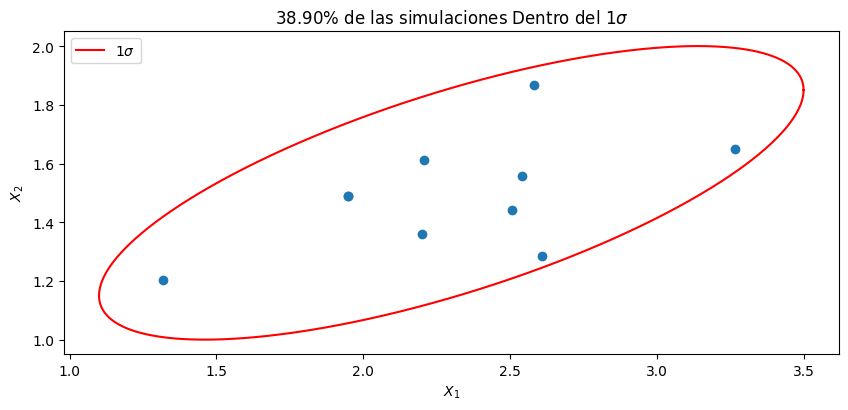

In [ ]:
plt.figure(figsize=(10, 8))

# Selecciona 10 puntos aleatorios de X_inside
diez_puntos_random = X_inside[np.random.randint(0, X_inside.shape[0], 10)]

# Gráfico de los 10 puntos aleatorios
plt.scatter(diez_puntos_random[:, 0], diez_puntos_random[:, 1])

# Elipse 1sigma
elipse_1sigma = get_ellipse(mu, cov, nsigma=1)
plt.plot(elipse_1sigma[0, :], elipse_1sigma[1, :], c="red", label="1$\sigma$")
plt.legend(title="")

# Ajustes adicionales
plt.axis("scaled")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title(fr"{fraccion_dentro:.2%} de las simulaciones Dentro del 1$\sigma$")


plt.show()


Este código en Python realiza simulaciones y visualiza distribuciones de probabilidad multivariadas. Lo dividiré en partes para explicar cada sección:

1. Importación de bibliotecas:
```python
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np
```
   - `scipy.stats`: Importa el módulo `multivariate_normal` que se utiliza para trabajar con distribuciones normales multivariadas.
   - `matplotlib.patches`: Importa la clase `Ellipse` que se utiliza para dibujar elipses en el gráfico.
   - `matplotlib.pyplot`: Importa la biblioteca de visualización `matplotlib.pyplot` para crear gráficos.
   - `numpy`: Importa la biblioteca `numpy` para realizar cálculos numéricos.

2. Definición de parámetros:
```python
N_simulaciones = 1000
mu1, mu2 = 2.3, 1.5
sigma1, sigma2 = 1.2, 0.5
rho = 0.7
```
   - `N_simulaciones`: Número de simulaciones que se realizarán.
   - `mu1` y `mu2`: Valores medios de las variables X1 y X2.
   - `sigma1` y `sigma2`: Desviaciones estándar de las variables X1 y X2.
   - `rho`: Coeficiente de correlación entre X1 y X2.

3. Definición del vector de media `mu` y la matriz de covarianza `cov`:
```python
mu = np.array([mu1, mu2])
cov = np.array([[sigma1**2, rho*sigma1*sigma2],
                [rho*sigma1*sigma2, sigma2**2]])
```
   - `mu`: Vector de media que contiene los valores medios de X1 y X2.
   - `cov`: Matriz de covarianza que describe la relación entre X1 y X2.

4. Definición de la función `get_ellipse` para generar una elipse:
```python
def get_ellipse(center, cova, nsigma=1, npoints=1000):
    cholesky_l = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, npoints)
    circle = np.column_stack([np.cos(t), np.sin(t)])
    ellipse = nsigma * circle @ cholesky_l.T + center
    return ellipse.T
```
   - Esta función toma un centro, una matriz de covarianza, y opcionalmente, un número de sigma (`nsigma`) y puntos (`npoints`) para generar una elipse.

5. Simulación de X1 siguiendo la distribución marginal g1(x1):
```python
X1 = np.random.normal(mu1, sigma1, size=N_simulaciones)
```
   - Se generan `N_simulaciones` valores de X1 a partir de una distribución normal con media `mu1` y desviación estándar `sigma1`.

6. Cálculo de los parámetros para simular X2 condicionalmente:
```python
mu2_prima = mu2 + rho*(sigma2/sigma1)*(X1 - mu1)
sigma2_prima = np.sqrt(sigma2**2 * (1 - rho**2))
```
   - Se calculan los parámetros de la distribución condicional de X2 dado X1.

7. Simulación de X2 siguiendo la distribución condicional h2(x2|x1):
```python
X2 = np.random.normal(mu2_prima, sigma2_prima, size=N_simulaciones)
```
   - Se generan `N_simulaciones` valores de X2 a partir de la distribución condicional dada X1.

8. Creación de un arreglo `X` que contiene las simulaciones de X1 y X2:
```python
X = np.array([X1, X2]).T
```

9. Gráfico de los puntos simulados en el espacio bidimensional X1-X2:
```python
plt.figure(figsize=(10, 8))
plt.scatter(X1, X2, c="blue", label="Puntos simulados")
elipse_1sigma = get_ellipse(mu, cov, nsigma=1)
plt.plot(elipse_1sigma[0, :], elipse_1sigma[1, :], c="red", label=r"$1\sigma$")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title(r"$X = (X_1, X_2)$")
plt.axis("scaled")
plt.legend(title="")
plt.show()
```
   - Se muestra un gráfico de dispersión de los puntos simulados en azul.
   - Se traza una elipse 1sigma en rojo en el mismo gráfico para visualizar la distribución conjunta de X1 y X2.
   - Se ajusta el tamaño del gráfico y se agrega etiquetas y título para la visualización.

10. Gráfico adicional con 10 puntos aleatorios dentro de la elipse:
```python
plt.figure(figsize=(10, 8))
diez_puntos_random = X_inside[np.random.randint(0, X_inside.shape[0], 10)]
plt.scatter(diez_puntos_random[:, 0], diez_puntos_random[:, 1])
elipse_1sigma = get_ellipse(mu, cov, nsigma=1)
plt.plot(elipse_1sigma[0, :], elipse_1sigma[1, :], c="red", label="1$\sigma$")
plt.legend(title="")
plt.axis("scaled")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.title("Simulaciones dentro de la elipse")
plt.show()
```
   - Se muestra un segundo gráfico con 10 puntos aleatorios que se encuentran dentro de la elipse 1sigma.
   - Se traza la misma elipse 1sigma en rojo para referencia.